In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [39]:
df = pd.read_csv('credit_card.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [40]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [41]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [42]:
df['CREDIT_LIMIT'].value_counts().sort_values(ascending=False)

3000.000000    784
1500.000000    722
1200.000000    621
1000.000000    614
2500.000000    612
              ... 
8954.545455      1
6850.000000      1
6800.000000      1
8700.000000      1
1833.333333      1
Name: CREDIT_LIMIT, Length: 205, dtype: int64

In [43]:
df['CREDIT_LIMIT'].fillna('3000.000000', inplace=True)

In [44]:
df['MINIMUM_PAYMENTS'].mean()

864.2065423050816

In [45]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [46]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                         object
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [47]:
df.dropna(inplace=True)

In [48]:
df.drop('CUST_ID', axis=1, inplace=True)

In [49]:
df = df.drop(['CREDIT_LIMIT','MINIMUM_PAYMENTS'],axis = 1)

In [50]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df=sc.fit_transform(df)

In [52]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
pca_2_result = pca_2.fit_transform(df)

print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Cumulative variance explained by 2 principal components: 51.14%


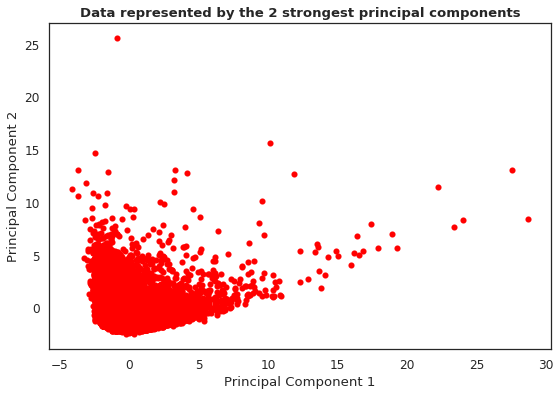

In [53]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], color='red',lw=0.1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data represented by the 2 strongest principal components',fontweight='bold')
plt.show()


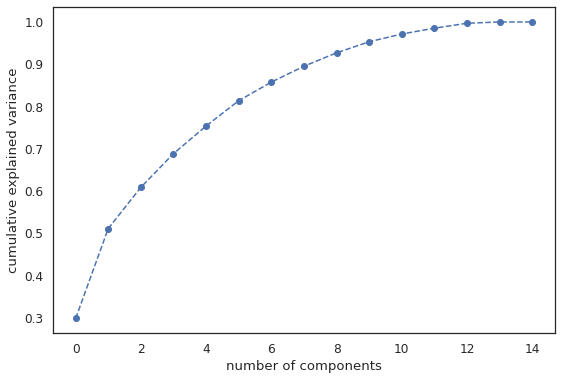

In [54]:
pca=PCA(whiten=True).fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o',linestyle='--')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [55]:
pca_10 = PCA(10)
pca_10_result = pca_10.fit_transform(df)

print ('Cumulative variance explained by 10 principal components: {:.2%}'.format(np.sum(pca_10.explained_variance_ratio_)))

Cumulative variance explained by 10 principal components: 95.32%


In [56]:
pca10=PCA(n_components=10)

In [57]:
scores_pca=pca10.fit_transform(df)

In [58]:
scores_pca

array([[-1.36854625, -1.12251976,  0.60881315, ...,  0.25367654,
         0.24398367, -0.30732757],
       [-1.62407169,  2.13334577,  0.48415193, ..., -1.24794128,
        -0.3276505 , -0.60637147],
       [ 0.86960014, -0.45967761,  0.02588263, ..., -0.70673879,
        -0.71161818, -0.60983533],
       ...,
       [-0.48251044, -1.65408464, -0.58425562, ..., -0.81745484,
         0.50146781,  0.01996666],
       [-2.03475513, -0.68700703,  0.9200456 , ...,  0.17509922,
        -0.16834642, -0.30904055],
       [-0.307437  , -0.11319225,  0.91225262, ...,  0.17795934,
        -0.36770891, -0.43094588]])

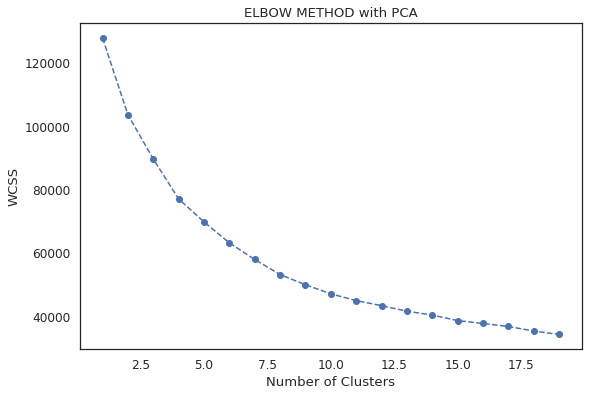

In [60]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scores_pca)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,20), wcss,marker='o',linestyle='--')
plt.title('ELBOW METHOD with PCA')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

K-Means Clustering

In [63]:
import sklearn.cluster as cluster
kmeans_pca = cluster.KMeans(n_clusters=5,random_state=17,init='k-means++')
y_kmeans = kmeans_pca.fit(scores_pca)

In [64]:
y_kmeans

KMeans(n_clusters=5, random_state=17)

In [65]:
kmeans_labels = kmeans_pca.fit_predict(scores_pca)
pd.Series(kmeans_labels).value_counts()

2    3884
1    2398
4    1375
0    1212
3      81
dtype: int64

K-Means Clustering with PCA Result

In [66]:
df=pd.DataFrame(df)

In [67]:
df_segm_pca_kmeans=pd.concat([df.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_segm_pca_kmeans.columns.values[-10: ]=['100','101','102','103','104','105','106','107','108','109']

In [68]:
df_segm_pca_kmeans['cluster K-Means PCA']=kmeans_pca.labels_

In [69]:
df_segm_pca_kmeans.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,100,101,102,103,104,105,106,107,108,109,cluster K-Means PCA
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.528979,-0.525551,0.36068,-1.368546,-1.122520,0.608813,-0.639829,0.457903,0.221593,0.112189,0.253677,0.243984,-0.307328,2
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.818642,0.234227,0.36068,-1.624072,2.133346,0.484152,0.344310,0.933186,-0.603978,0.620556,-1.247941,-0.327650,-0.606371,0
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,-0.383805,-0.525551,0.36068,0.869600,-0.459678,0.025883,-1.781366,-1.726986,-1.001126,-0.973389,-0.706739,-0.711618,-0.609835,4
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,-0.598688,-0.525551,0.36068,-1.047260,-0.393484,1.510335,-0.686470,0.310291,0.396354,-0.314721,0.234157,-0.045001,0.643289,2
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.364368,-0.525551,0.36068,-1.350652,-0.736023,0.504742,-1.152392,0.146970,0.033968,0.625765,0.102552,0.110488,-0.465370,2
5,0.117878,0.518084,0.154492,-0.356934,1.019822,-0.466786,0.439310,-0.678661,0.550784,-0.675349,-0.476070,-0.269945,-0.115060,-0.525551,0.36068,0.464209,-0.696007,-0.803379,-0.525837,0.871741,0.870061,0.513849,-0.007016,0.174951,-0.217332,1
6,-0.450277,0.518084,2.849408,3.500548,0.306664,-0.466786,1.269843,2.673451,1.599199,-0.675349,-0.476070,1.983008,1.596313,2.893453,0.36068,6.061331,-0.092718,1.706328,0.641694,-1.134664,-2.079822,0.548884,-0.127965,0.437219,0.996854,4
7,0.124520,0.518084,-0.265388,-0.356934,0.027792,-0.466786,1.269843,-0.678661,1.599199,-0.675349,-0.476070,-0.109020,-0.364116,-0.525551,0.36068,0.568113,-1.103749,-1.763948,-0.387511,0.530278,0.520844,-0.068048,-0.620495,0.773251,0.431392,1
8,-0.264026,0.518084,-0.066330,0.041603,-0.233408,-0.466786,-0.391225,-0.399319,-0.287947,-0.675349,-0.476070,-0.390639,-0.360933,-0.525551,0.36068,-0.501754,-0.736183,0.175836,-0.999901,0.171866,0.212098,0.485161,0.027546,0.404267,-0.107861,2
9,-0.678504,-1.400712,0.130303,0.415209,-0.454576,-0.466786,-0.806490,-0.119974,-0.916995,-0.675349,-0.476070,-0.471102,-0.196336,-0.525551,0.36068,-0.838638,-0.961824,1.815357,-0.406613,0.371472,0.204421,-0.701245,0.134261,0.220376,0.062483,2


In [70]:
df_segm_pca_kmeans['cluster']=df_segm_pca_kmeans['cluster K-Means PCA'].map({0:'first',
                                                                             1:'second',
                                                                             2:'third',
                                                                             3:'fourth',
                                                                             4:'fifth'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


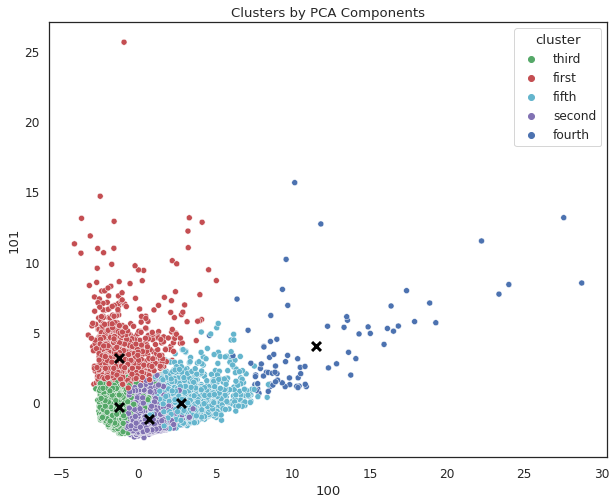

In [73]:
x_axis=df_segm_pca_kmeans[100]
y_axis=df_segm_pca_kmeans[101]
plt.figure(figsize=(10, 8))
sns.scatterplot(x_axis, y_axis, hue=df_segm_pca_kmeans['cluster'], palette=['g','r','c','m','b'])
centers_pca= kmeans_pca.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 1],
            marker='x', s=80, linewidths=4,
            color='black', zorder=10,lw=3)
plt.title('Clusters by PCA Components')
plt.show()